In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('FINAL_DATASET.csv')
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,latitude,longitude,weather_tempmax,weather_tempmin,weather_temp,weather_feelslikemax,weather_feelslikemin,...,Activity_Snowmobiling,Activity_Snowshoeing,Activity_Suicide,Activity_Swimming,Activity_Undetermined,Activity_Vessel Related,Activity_Wading,Activity_Walking,Activity_Wildlife watching,Cause of Death
0,0,1,1.0,37.849927,-122.517752,59.6,41.2,49.0,59.6,37.4,...,False,False,False,False,False,True,False,False,False,Drowning
1,1,2,2.0,37.849927,-122.517752,59.6,41.2,49.0,59.6,37.4,...,False,False,False,False,False,True,False,False,False,Undetermined
2,2,3,3.0,32.007155,-90.858514,45.3,21.7,34.4,42.3,21.7,...,False,False,False,False,False,False,False,False,False,Motor Vehicle Crash
3,3,4,4.0,32.007155,-90.858514,45.3,21.7,34.4,42.3,21.7,...,False,False,False,False,False,False,False,False,False,Motor Vehicle Crash
4,4,5,5.0,40.598479,-73.857927,26.0,13.9,19.6,13.8,1.0,...,False,False,False,False,False,False,False,False,False,Undetermined


In [3]:
columns_to_keep = [col for col in df.columns if not (col.startswith('Unnamed:') or col.startswith('Activity'))]

df = df[columns_to_keep]



In [10]:
#For all classes

y = pd.DataFrame(df['Cause of Death'])

X = df.drop(columns=[col for col in df.columns if col.startswith('Cause of Death')], errors='ignore')


print(X.shape)
print(y)

# Display unique classes in the original target variable
print("Original target variable (y):")
print(y.value_counts())  # Assuming y is a pandas Series



(4545, 545)
           Cause of Death
0                Drowning
1            Undetermined
2     Motor Vehicle Crash
3     Motor Vehicle Crash
4            Undetermined
...                   ...
4540  Motor Vehicle Crash
4541  Motor Vehicle Crash
4542              Suicide
4543         Undetermined
4544         Undetermined

[4545 rows x 1 columns]
Original target variable (y):
Cause of Death                        
Drowning                                  844
Motor Vehicle Crash                       820
Suicide                                   642
Undetermined                              585
Fall                                      489
Medical - During physical activity        317
Medical - Not during physical activity    237
Medical - Unknown                          82
Hyperthermia                               80
Homicide                                   50
Aircraft incident                          46
Hypothermia                                44
Avalanche                     

In [17]:
#For just Drowning guy
# Separate features (X) and target variable (y)
y = pd.DataFrame(df['Cause of Death'])

# Assuming y is a DataFrame with a column 'Cause of Death'
y['binary_label'] = y['Cause of Death'].apply(lambda x: 1 if x == 'Drowning' else 0)
# Assuming `y` is your DataFrame
y = y.drop(columns=['Cause of Death'])
# Rename the column
y = y.rename(columns={'binary_label': 'Cause of Death'})

# Assuming y contains the original labels
#y_binary = y.apply(lambda label: 1 if label == 'Drowning' else 0)
#y = y_binary
# Train-test split
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, stratify=y_binary, random_state=42)


X = df.drop(columns=[col for col in df.columns if col.startswith('Cause of Death')], errors='ignore')
X = X.drop(columns=[col for col in X.columns if col.startswith('Death')], errors='ignore')

print(X.shape)
print(y)

# Display unique classes in the original target variable
print("Original target variable (y):")
print(y.value_counts())  # Assuming y is a pandas Series


(4545, 529)
      Cause of Death
0                  1
1                  0
2                  0
3                  0
4                  0
...              ...
4540               0
4541               0
4542               0
4543               0
4544               0

[4545 rows x 1 columns]
Original target variable (y):
Cause of Death
0                 3701
1                  844
Name: count, dtype: int64


Index(['latitude', 'longitude', 'weather_tempmax', 'weather_tempmin',
       'weather_temp', 'weather_feelslikemax', 'weather_feelslikemin',
       'weather_feelslike', 'weather_dew', 'weather_humidity',
       ...
       'Age Range_15-24', 'Age Range_25-34', 'Age Range_35 - 44',
       'Age Range_35-44', 'Age Range_45 - 54', 'Age Range_45-54',
       'Age Range_55-64', 'Age Range_65+', 'Age Range_Not Reported',
       'Age Range_Unintentional'],
      dtype='object', length=545)


In [18]:

# Display unique classes in the original target variable
print("Original target variable (y):")
print(y.value_counts())  # Assuming y is a pandas Series


Original target variable (y):
Cause of Death
0                 3701
1                  844
Name: count, dtype: int64


In [19]:
# Encode all non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object', 'category']).columns
print(f"Non-numerical columns detected: {list(non_numeric_columns)}")

df_encoded = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)
print("Shape of DataFrame after encoding:", df_encoded.shape)

# Separate features (X) and target variable (y)
X = df_encoded.drop(columns=[col for col in df_encoded.columns if col.startswith('Cause of Death_') or col.startswith('Death')], errors='ignore')












Non-numerical columns detected: ['Cause of Death']
Shape of DataFrame after encoding: (4545, 585)


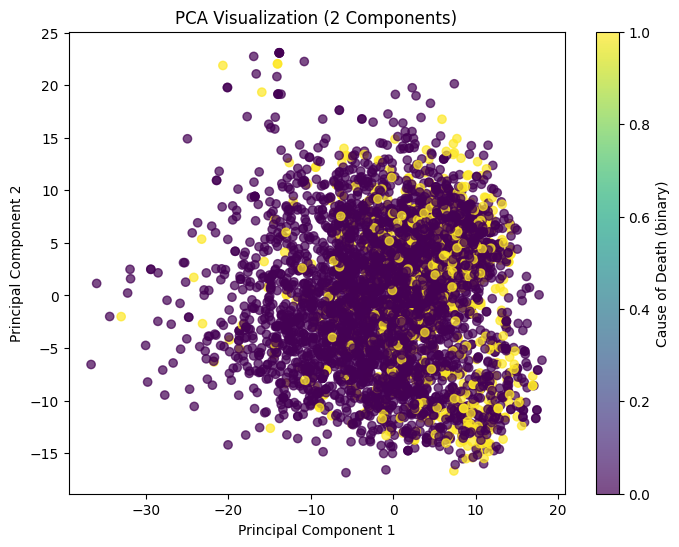

Explained Variance Ratio: [0.12998934 0.08728253]


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Standardize the features (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Step 3: Visualize the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y['Cause of Death'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cause of Death (binary)')
plt.title('PCA Visualization (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Optional: Explained Variance Ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

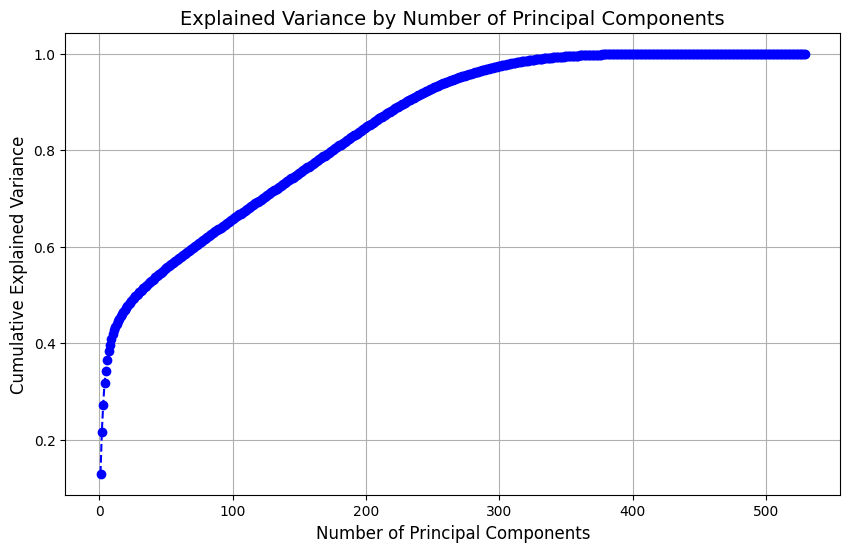

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA on the standardized features
pca_full = PCA()
pca_full.fit(X_scaled)

# Calculate the cumulative explained variance ratio
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Explained Variance by Number of Principal Components', fontsize=14)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid()
plt.show()


Lets use the top 300 components! This will give us 

The top 300 PCA components explain 97.42% of the original variance.


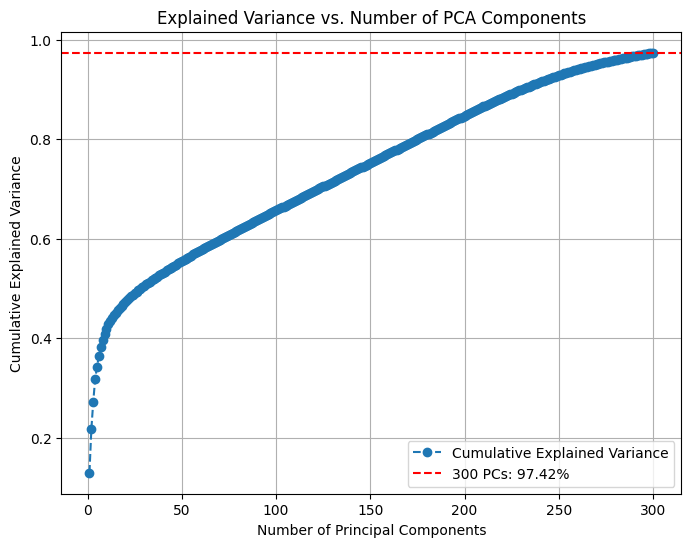

In [22]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA
pca = PCA(n_components=300, random_state=42)
pca.fit(X_scaled)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
variance_300 = cumulative_variance[-1]  # Variance captured by the top 300 components

print(f"The top 300 PCA components explain {variance_300:.2%} of the original variance.")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, 301), cumulative_variance, marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of PCA Components')
plt.axhline(variance_300, color='r', linestyle='--', label=f'300 PCs: {variance_300:.2%}')
plt.legend()
plt.grid()
plt.show()


In [23]:
from sklearn.decomposition import PCA

# Fit PCA and transform the data
pca = PCA(n_components=300, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Now X_pca contains only the top 300 PCA components
print(X_pca.shape)  # Verify dimensions (should be rows x 300)


(4545, 300)


In [24]:




# Encode the target variable
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
rf.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = rf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\spenc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 0.8404840484048405

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       740
           1       0.71      0.24      0.36       169

    accuracy                           0.84       909
   macro avg       0.78      0.61      0.63       909
weighted avg       0.82      0.84      0.81       909


Confusion Matrix:
 [[724  16]
 [129  40]]



Feature Importances:


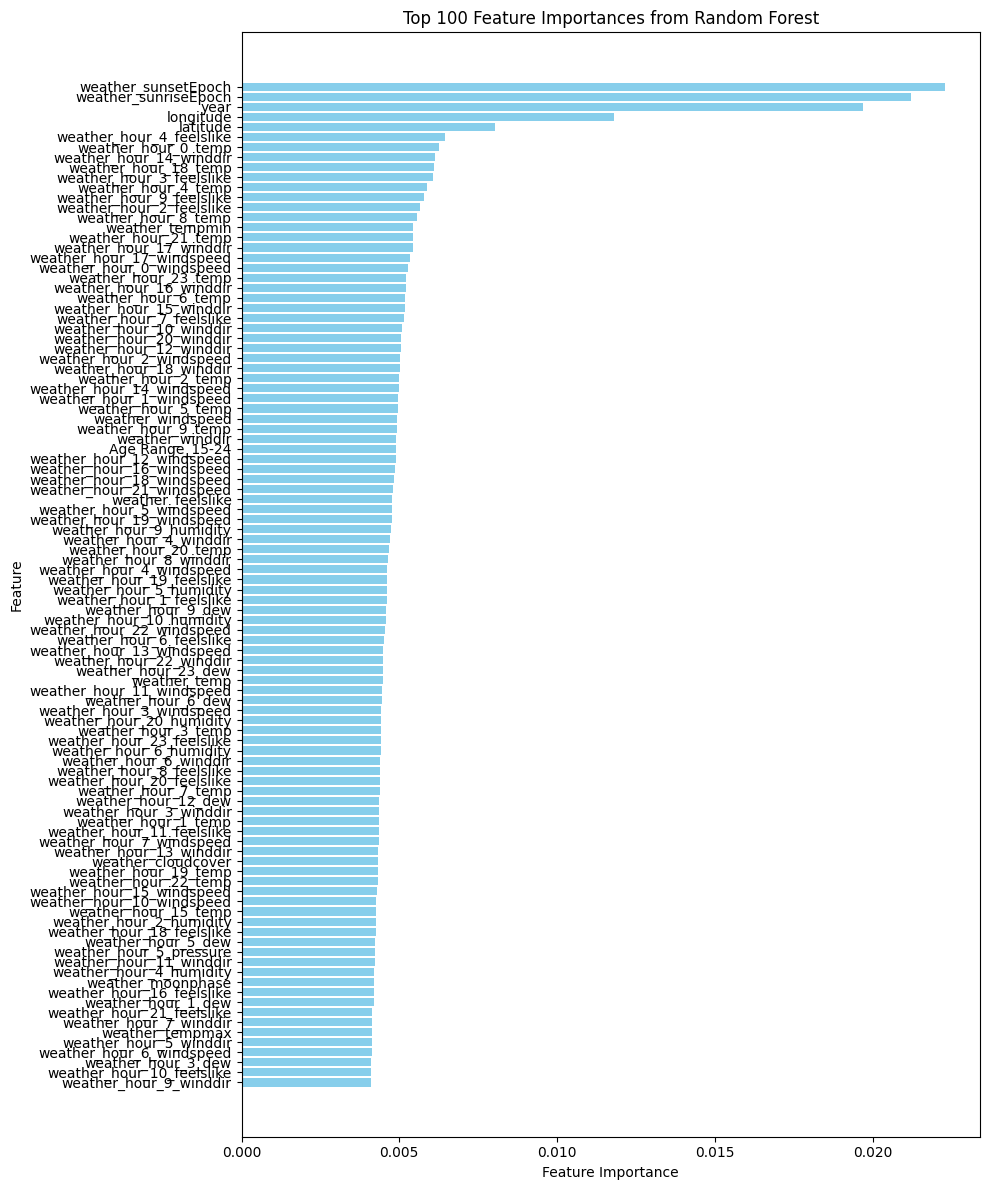

In [25]:

import pandas as pd
import matplotlib.pyplot as plt

feature_importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,  # Assuming X is a DataFrame; replace with feature names if it's not
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")

# Limit to the top 100 most important features
top_features_df = feature_importances_df.head(100)

# Plot Top 100 Feature Importances
plt.figure(figsize=(10, 12))  # Adjust height for more features
plt.barh(top_features_df['Feature'], top_features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 100 Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.tight_layout()
plt.show()



Now we SHAP!

In [11]:
import shap
shap.initjs()

C:\Users\spenc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:


explainer = shap.Explainer(rf)
explainer.feature_names = X.columns
sv = explainer(X_test)

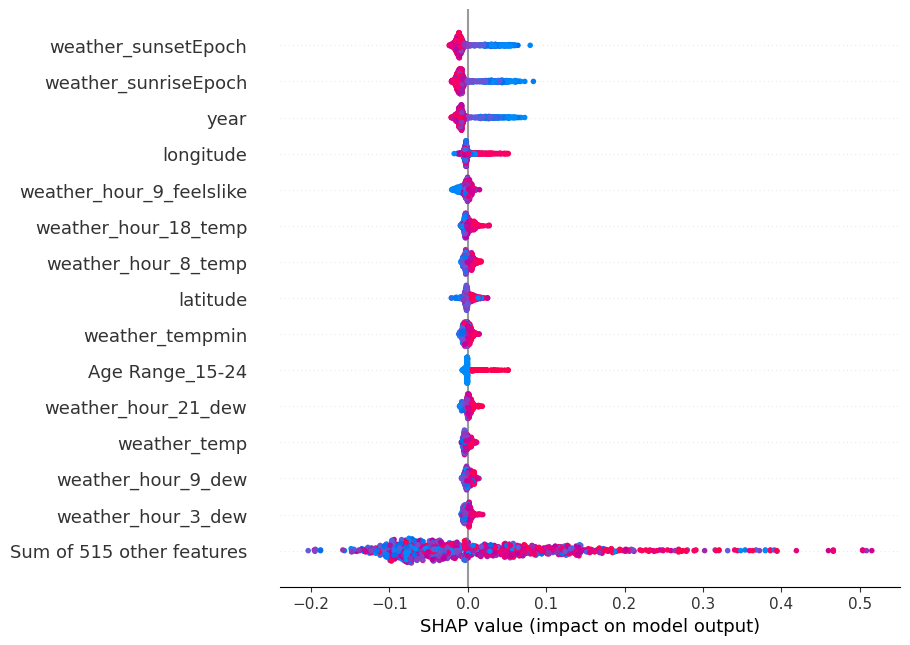

In [31]:
exp = shap.Explanation(sv[:,:,1], sv.base_values[:,1], X, feature_names=X.columns)
shap.plots.beeswarm(exp, show=False, color_bar=False, max_display=15)
plt.savefig("beeswarm.png", format="png")

In [35]:
idx = 1

for i in range(10):
    shap.plots.waterfall(exp[i], show=False)
    name = f"waterfall_{i}.png"
    plt.savefig(name, format="png")
    plt.close()
    

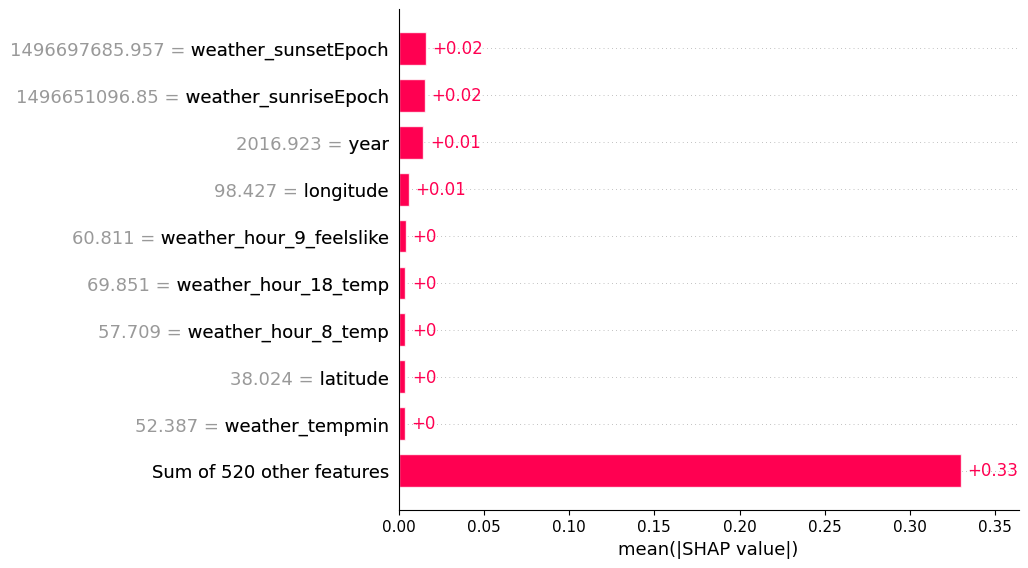

In [36]:
shap.plots.bar(exp, show_data=True)

In [26]:
# Logistic Regression (Multiclass)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)  # Adjust max_iter if needed
log_reg.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust 'n_neighbors' to tune performance
knn.fit(X_train, y_train)

# Evaluate KNN
y_pred_knn = knn.predict(X_test)
print("\nKNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

C:\Users\spenc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Results:
Accuracy: 0.8085808580858086
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       740
           1       0.14      0.01      0.01       169

    accuracy                           0.81       909
   macro avg       0.48      0.50      0.45       909
weighted avg       0.69      0.81      0.73       909

[[734   6]
 [168   1]]

KNN Results:
Accuracy: 0.7810781078107811
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       740
           1       0.33      0.18      0.23       169

    accuracy                           0.78       909
   macro avg       0.58      0.55      0.55       909
weighted avg       0.74      0.78      0.75       909

[[680  60]
 [139  30]]


In [27]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with Ridge regularization
ridge_log_reg = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial', max_iter=1000, random_state=42)
ridge_log_reg.fit(X_train, y_train)

# Evaluate Ridge Logistic Regression
y_pred_ridge = ridge_log_reg.predict(X_test)
print("Ridge Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ridge)}")
print(classification_report(y_test, y_pred_ridge))


C:\Users\spenc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Ridge Logistic Regression Results:
Accuracy: 0.8085808580858086
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       740
           1       0.14      0.01      0.01       169

    accuracy                           0.81       909
   macro avg       0.48      0.50      0.45       909
weighted avg       0.69      0.81      0.73       909



Now, lets do some PCA

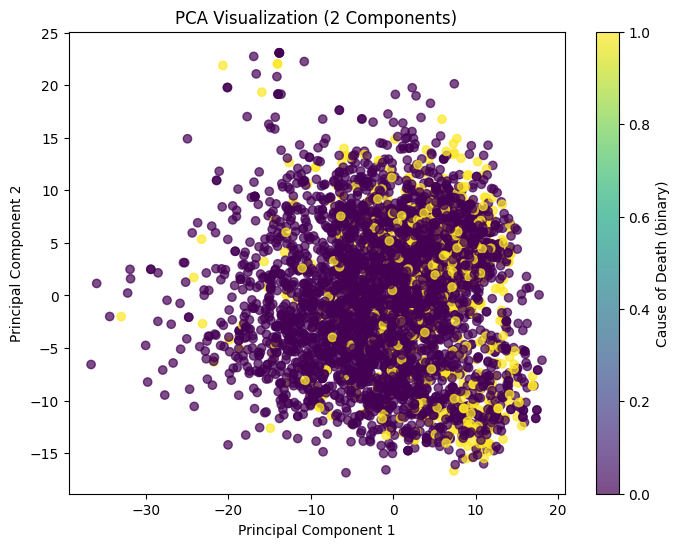

Explained Variance Ratio: [0.12998934 0.08728253]


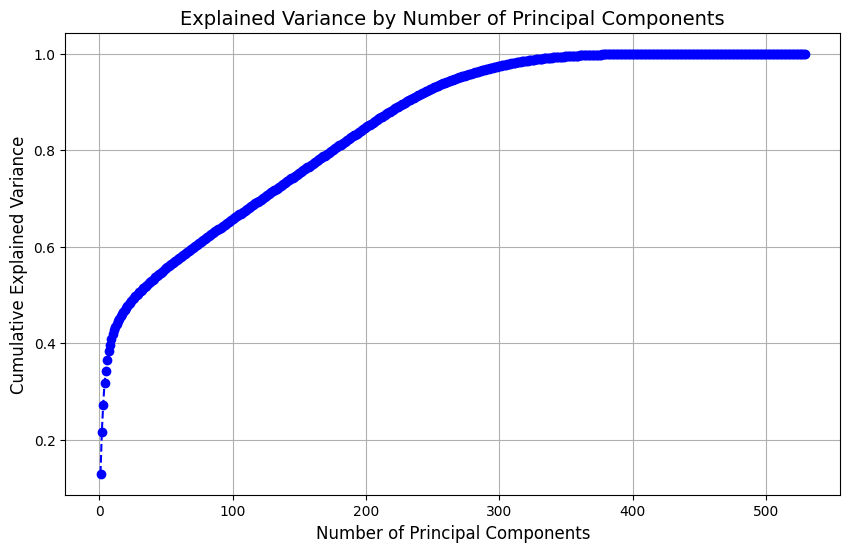

Correlation matrix? Cuz this is a crazy graph!

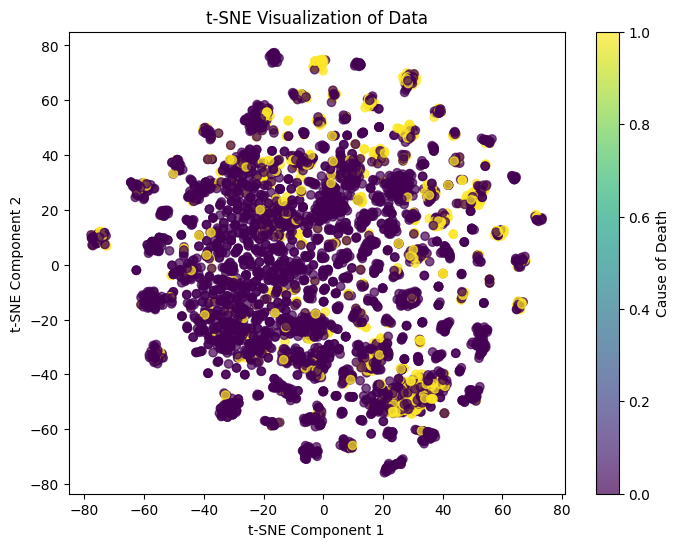

In [31]:
# Calculate feature means and standard deviations before scaling (use original X)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Run t-SNE on your data (after scaling if not already done)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the t-SNE embedding
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y['Cause of Death'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cause of Death')
plt.title('t-SNE Visualization of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


C:\Users\spenc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


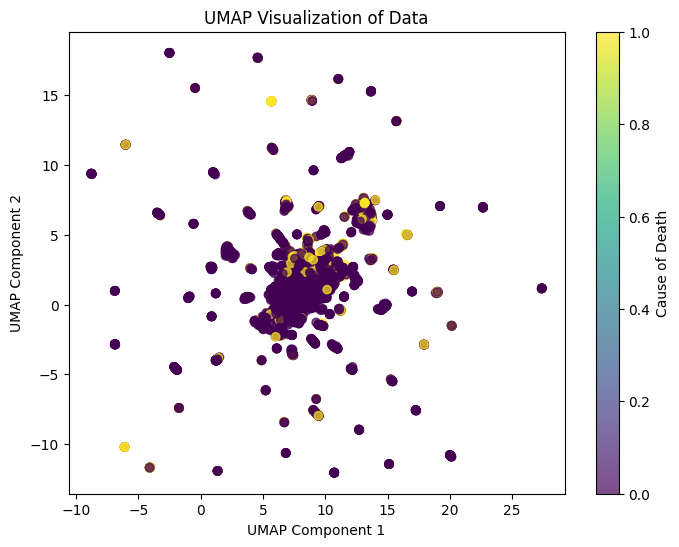

In [34]:
#Umap??

import umap

# Run UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Plot UMAP results
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y['Cause of Death'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cause of Death')
plt.title('UMAP Visualization of Data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()


Okay so we already did 1)4 methods, 2)Dimmension reduction, 3)Paying online for extra features from Weather

To do: 2.5)Cut variables using PCA
4)deep learning model, with a comprehensive hyperparameter optimization process
5)Shap
6)Class Imbalances -- bring back the lots of classes!! And hear thoughts about what to do?
7) REport -- Github -- List of methods -- Video -- yuck! I am afraid of that one

